In [2]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# 한글 폰트 깨지지 않게 하기
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 데이터 불러오기

raw_data = pd.read_csv("../../01.files/02.Bigsata_analysis/통신고객이탈.csv", encoding = 'euc-kr')
raw_data.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [5]:
raw_data.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [6]:
raw_x = raw_data.drop(['CHURN','CUSTOMER_ID'], axis = 1)
raw_y = raw_data['CHURN'].map({'Active':0, 'Churned':1})
print(raw_x.shape, raw_y.shape)

(930, 13) (930,)


In [9]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,F,CAT 100,ASAD170,Med
1,M,CAT 100,S50,Med
2,M,CAT 100,ASAD170,Med
3,M,CAT 100,ASAD170,Med
4,F,CAT 100,S50,Med


'Dummy 변환 후:'

,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,27,30.87,10,373,656.4,11,28.0,411,810.4
2,27,49.40,11,260,582.0,0,0.0,265,614.1
3,61,48.60,1,294,661.8,14,101.5,326,844.0
4,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610


In [12]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'Scale/Dummy 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,0,...,0,0,0,0,0,0,1,0,0,0
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,0,...,0,0,0,0,0,0,1,0,0,0
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,1,...,0,0,0,0,0,0,1,0,0,0


In [14]:
# 변환된 설명변수 데이터 사용:df_x_converted 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (651, 33)
분할된 Test Data: (279, 33)


In [15]:
svm_uncust = SVC(random_state=1234)
svm_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy : {:.3f}".format(svm_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}".format(svm_uncust.score(df_test_x, df_test_y)))

Train Accuracy : 0.906
Test Accuracy : 0.885


In [33]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

#para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [0.1 * c for c in range(1, 33, 2)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [34]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.1,0.791,0.842
1,0.3,0.791,0.842
2,0.5,0.797,0.839
3,0.7,0.856,0.860
4,0.9,0.902,0.875
5,1.1,0.909,0.889
6,1.3,0.922,0.907
7,1.5,0.923,0.914
8,1.7,0.931,0.918
9,1.9,0.929,0.921


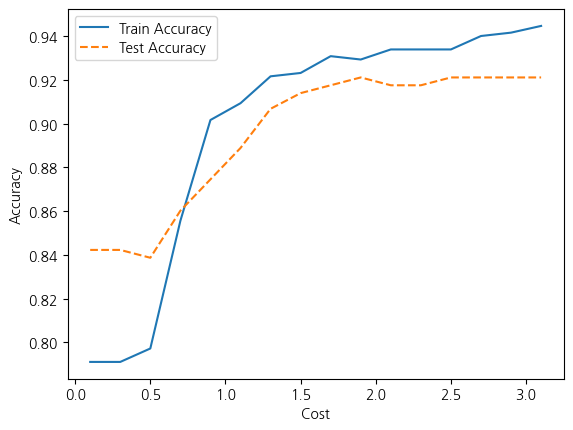

In [35]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

C = 1.9

### Gamma(데이터 영향범위) 변경에 따른 모델 성능

In [51]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

#para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_gamma = [0.01* gamma for gamma in range(1, 21)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [52]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.7911,0.8423
1,0.02,0.7911,0.8423
2,0.03,0.8233,0.8459
3,0.04,0.8387,0.8530
4,0.05,0.8449,0.8530
5,0.06,0.8587,0.8638
6,0.07,0.8664,0.8638
7,0.08,0.8740,0.8638
8,0.09,0.8909,0.8638
9,0.10,0.8971,0.8674


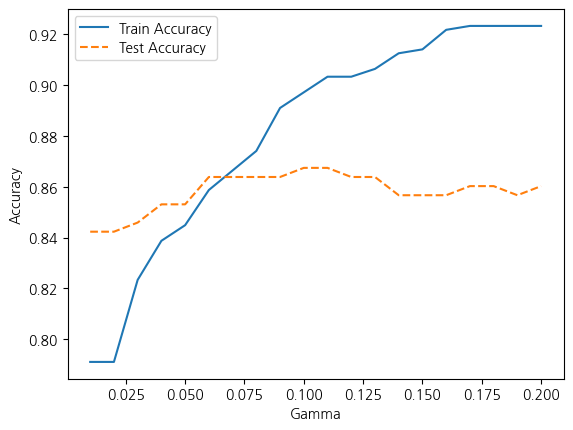

In [53]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

Gamma = 0.11

In [54]:
# 최종 모델
svc_final = SVC(gamma=0.11, C=1.9, random_state=1234)
svc_final.fit(df_train_x, df_train_y)

# 평가
y_pred = svc_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 0.948
Test Accuracy : 0.910

Test Confusion matrix: 
[[227   8]
 [ 17  27]]
              precision    recall  f1-score   support

           0      0.930     0.966     0.948       235
           1      0.771     0.614     0.684        44

    accuracy                          0.910       279
   macro avg      0.851     0.790     0.816       279
weighted avg      0.905     0.910     0.906       279

